<a href="https://colab.research.google.com/github/s-shahd-h/Financial-Risk-prediction-using-Feature-selection/blob/main/XGB_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
ImportWarning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/data.csv.xls')


df = df.drop(columns=["id"], errors="ignore")


X = df.drop("Bankrupt?", axis=1)
y = df["Bankrupt?"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#XGBoost without Feature Selection

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train XGBoost model on all features
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print("Baseline Model (without Feature Selection):\n")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:36:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Baseline Model (without Feature Selection):

Accuracy:  0.9663
Precision: 0.6087
Recall:    0.2745
F1 Score:  0.3784

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.61      0.27      0.38        51

    accuracy                           0.97      1364
   macro avg       0.79      0.63      0.68      1364
weighted avg       0.96      0.97      0.96      1364



#Genetic Algorithm Feature Selection


In [ ]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 7.3 MB/s eta 0:00:00


In [ ]:
import random
from deap import base, creator, tools
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# GA setup
num_features = X_train.shape[1]

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", lambda: random.randint(0, 1))
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=num_features)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Fitness function using XGBoost
def evalFitness(individual):
    selected_features = [i for i in range(len(individual)) if individual[i] == 1]
    if len(selected_features) == 0:
        return 0.0,
    clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    clf.fit(X_train[:, selected_features], y_train)
    pred = clf.predict(X_test[:, selected_features])
    acc = accuracy_score(y_test, pred)
    return acc,

toolbox.register("evaluate", evalFitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# GA execution function
def run_ga():
    pop = toolbox.population(n=30)
    NGEN = 20
    for gen in range(NGEN):
        offspring = toolbox.select(pop, len(pop))
        offspring = list(map(toolbox.clone, offspring))

        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < 0.5:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < 0.2:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        pop[:] = offspring

    top_individual = tools.selBest(pop, 1)[0]
    selected_features = [i for i in range(len(top_individual)) if top_individual[i] == 1]
    return selected_features

# Run GA and get selected features
ga_selected_features = run_ga()
print(f"\nNumber of selected features: {len(ga_selected_features)}")
print(f"Selected feature indices: {ga_selected_features}")

# Print selected feature names (if using pandas DataFrame)
selected_column_names = X.columns[ga_selected_features]
print("\nSelected Feature Names:")
print(selected_column_names.tolist())


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:36:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:36:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:36:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:36:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:36:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


Number of selected features: 52
Selected feature indices: [0, 2, 4, 6, 8, 9, 10, 12, 13, 14, 15, 19, 21, 23, 25, 26, 27, 30, 31, 34, 35, 37, 39, 40, 43, 44, 45, 48, 50, 51, 52, 56, 57, 59, 60, 61, 63, 64, 66, 67, 69, 70, 73, 74, 76, 77, 79, 80, 81, 88, 90, 92]

Selected Feature Names:
[' ROA(C) before interest and depreciation before interest', ' ROA(B) before interest and depreciation after tax', ' Realized Sales Gross Margin', ' Pre-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Cash Flow Per Share', ' Operating Profit Per Share (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate', ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %', ' Interest Expense Ratio', ' Tota

#Performance Evaluation of XGBoost Using GA-Selected Features


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train the model using only the GA-selected features
xgb_ga = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_ga.fit(X_train[:, ga_selected_features], y_train)

# Make predictions
y_pred_ga = xgb_ga.predict(X_test[:, ga_selected_features])

# Evaluate performance
accuracy_ga = accuracy_score(y_test, y_pred_ga)
precision_ga = precision_score(y_test, y_pred_ga)
recall_ga = recall_score(y_test, y_pred_ga)
f1_ga = f1_score(y_test, y_pred_ga)

# Display results
print("Performance After GA Feature Selection (XGBoost):\n")
print(f"Accuracy:  {accuracy_ga:.4f}")
print(f"Precision: {precision_ga:.4f}")
print(f"Recall:    {recall_ga:.4f}")
print(f"F1 Score:  {f1_ga:.4f}")

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_ga))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:40:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Performance After GA Feature Selection (XGBoost):

Accuracy:  0.9699
Precision: 0.7273
Recall:    0.3137
F1 Score:  0.4384

Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.73      0.31      0.44        51

    accuracy                           0.97      1364
   macro avg       0.85      0.65      0.71      1364
weighted avg       0.96      0.97      0.96      1364



# Applying Particle Swarm Optimization (PSO) to Select Best Features for XGBoost

In [ ]:
!pip install pyswarms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 7.0 MB/s eta 0:00:00


#PSO Feature Selection


In [ ]:
import numpy as np
import pyswarms as ps
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define the fitness function for each feature subset
def pso_objective_function(particles):
    n_particles = particles.shape[0]
    scores = []

    for i in range(n_particles):
        # Create a binary mask for selected features
        mask = particles[i] > 0.5
        if np.sum(mask) == 0:
            scores.append(1.0)  # Penalize if no features are selected
            continue

        # Train and evaluate XGBoost model
        clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
        clf.fit(X_train[:, mask], y_train)
        pred = clf.predict(X_test[:, mask])
        acc = 1.0 - accuracy_score(y_test, pred)  # PSO minimizes, so we invert the score
        scores.append(acc)

    return np.array(scores)

# PSO options (with required 'k' and 'p')
options = {
    'c1': 2,
    'c2': 2,
    'w': 0.9,
    'k': 5,  # Number of neighbors
    'p': 2   # Probability
}

# Number of features = number of columns in the dataset
dimensions = X_train.shape[1]

# Initialize Binary PSO optimizer
optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=dimensions, options=options)

# Run PSO optimization
best_cost, best_pos = optimizer.optimize(pso_objective_function, iters=20)

# Extract selected features
pso_selected_features = np.where(best_pos > 0.5)[0]
print(f"\nPSO Selected Features ({len(pso_selected_features)}):")
print(pso_selected_features)


2025-05-16 17:40:08,064 - pyswarms.discrete.binary - INFO - Optimize for 20 iters with {'c1': 2, 'c2': 2, 'w': 0.9, 'k': 5, 'p': 2}
pyswarms.discrete.binary:   0%|          |0/20/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:40:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:40:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:40:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:40:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warning


PSO Selected Features (55):
[ 1  2  3  4  5  6  9 10 14 15 16 17 19 20 24 27 28 29 35 36 39 40 43 45
 46 48 49 50 52 55 56 60 66 67 68 69 70 72 73 74 75 77 78 79 80 81 82 83
 84 89 90 91 92 93 94]


#Performance Evaluation of XGBoost Using PSO


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train XGBoost using the features selected by PSO
xgb_pso = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_pso.fit(X_train[:, pso_selected_features], y_train)

# Predict on the test set
y_pred_pso = xgb_pso.predict(X_test[:, pso_selected_features])

# Calculate performance metrics
accuracy_pso = accuracy_score(y_test, y_pred_pso)
precision_pso = precision_score(y_test, y_pred_pso)
recall_pso = recall_score(y_test, y_pred_pso)
f1_pso = f1_score(y_test, y_pred_pso)

# Display the results
print("Performance After PSO Feature Selection (XGBoost):\n")
print(f"Accuracy:  {accuracy_pso:.4f}")
print(f"Precision: {precision_pso:.4f}")
print(f"Recall:    {recall_pso:.4f}")
print(f"F1 Score:  {f1_pso:.4f}")

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_pso))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:46:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Performance After PSO Feature Selection (XGBoost):

Accuracy:  0.9721
Precision: 0.7600
Recall:    0.3725
F1 Score:  0.5000

Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1313
           1       0.76      0.37      0.50        51

    accuracy                           0.97      1364
   macro avg       0.87      0.68      0.74      1364
weighted avg       0.97      0.97      0.97      1364



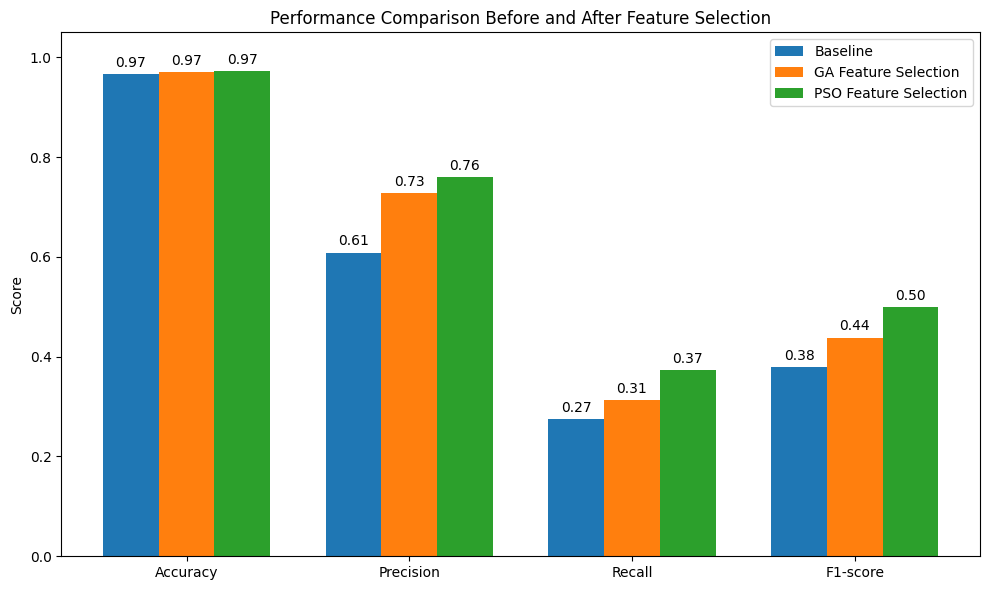

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ==== Replace these with your actual values ====
# Baseline model
accuracy_base = 0.9663
precision_base = 0.6087
recall_base = 0.2745
f1_base = 0.3784

# After GA Feature Selection
accuracy_ga =  0.9699
precision_ga = 0.7273
recall_ga = 0.3137
f1_ga = 0.4384

# After PSO Feature Selection
accuracy_pso = 0.9721
precision_pso = 0.7600
recall_pso =  0.3725
f1_pso =  0.5000

# ==============================================

# Metrics and values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
baseline = [accuracy_base, precision_base, recall_base, f1_base]
ga = [accuracy_ga, precision_ga, recall_ga, f1_ga]
pso = [accuracy_pso, precision_pso, recall_pso, f1_pso]

x = np.arange(len(metrics))  # label locations
width = 0.25  # bar width

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width, baseline, width, label='Baseline')
bar2 = ax.bar(x, ga, width, label='GA Feature Selection')
bar3 = ax.bar(x + width, pso, width, label='PSO Feature Selection')

# Labels and titles
ax.set_ylabel('Score')
ax.set_title('Performance Comparison Before and After Feature Selection')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.05)
ax.legend()

# Annotate function
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add value annotations
annotate_bars(bar1)
annotate_bars(bar2)
annotate_bars(bar3)

plt.tight_layout()
plt.show()
